In [1]:
 #需导入的模块
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import datetime
from numpy import random #经常有用
import re
import pymongo

#将pymongo数据转换成Dataframe
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["db_lianjia"]
mycol = mydb["chengjiao"]

x = list(mycol.find())
df=DataFrame(x)
#把没用的id删除掉
df=df.drop('_id',axis=1)    
df.drop_duplicates(inplace=True)
#把车位这一行删掉
df.drop(index=df[df['area']=='车位'].index,inplace=True) 
df['area']=df['area'].apply(lambda x: float(re.search("\d+(\.\d+)?",x).group()))
tofloat=lambda x:float(x)
df['unitPrice']=df['unitPrice'].apply(tofloat)
df['totalPrice']=df['totalPrice'].apply(tofloat)
df['dealDate']=pd.to_datetime(df['dealDate'])
df['dealCycle']=df['dealCycle'].map(lambda x:int(re.search('\d+',x).group()))
df['guaPai']=df['guaPai'].apply(lambda x: float(re.search("\d+(\.\d+)?",x).group()))

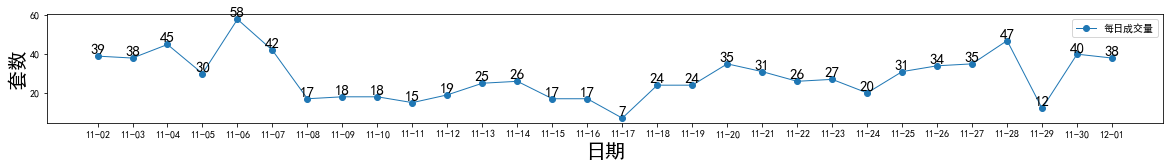

In [2]:
#获得每日成交量
df['count']=0
d=df.groupby(['dealDate']).count()['count']
d=d[-30:]

import matplotlib.pyplot as plt
plt.rcParams['font.family']=['SIMHEI']
plt.figure(figsize=(20, 2))
plt.plot(d.index,d.values,label='每日成交量',linewidth=1,marker='o')
plt.xlabel('日期',fontsize=20)
plt.ylabel('套数',fontsize=20)
plt.xticks(d.index,list(map(lambda x:x.date().strftime('%m-%d'),d.index)))
plt.legend()
for x,y in zip(d.index,d.values):
    plt.text(x, y+0.05, y, ha='center', va= 'bottom',fontsize=15)
plt.show()
 

In [ ]:
#获得某个单价区间的成交量
bins=[5000,10000,15000,20000,25000,30000]
cats=pd.cut(df['unitPrice'],bins)
X=np.arange(1,6)
Y=pd.value_counts(cats).values
x_label=list(map(lambda x:str(x/10000)+'-'+str((x+5000)/10000),bins[:5]))
color=['red','black','peru','orchid','deepskyblue']
plt.rcParams['font.family']=['SIMHEI']
plt.bar(x=X,height=Y,align='center',width=0.5,label='不同单价的销售量',color='g')
plt.xticks(X,x_label)
plt.xlabel('单价（万）',fontsize=20)
plt.ylabel('销售量',fontsize=20)
plt.legend(loc='best')
for x,y in zip(X,Y):
    s=str(y)+'套'
    plt.text(x, y+0.05, s, ha='center', va= 'bottom',fontsize=15)
plt.show()

In [ ]:
#获得某个小区的成交信息
try:
    # df=df.drop(columns=['count'])
    dwj=df[df['小区'].apply(lambda x:'万国公馆' in x and '公寓' not in x)]
    t=dwj.sort_values(['单价'])
    t.describe().round(0).unstack()
    print(dwj)
except KeyError as e:
    pass
# dwj.sort_values(by=['成交日期'])

In [3]:
dwj=df[df['title'].apply(lambda x:'万国宫馆' in x and '公寓' not in x)]
t=dwj.sort_values(['unitPrice'])
t.describe().round(0).unstack()
print(t)

        title  room    area   dealDate  totalPrice  unitPrice  dealCycle  \
52069  万国宫馆二期  3室2厅  151.67 2016-01-29       107.0     7055.0         15   
52036  万国宫馆二期  3室2厅  140.29 2017-03-01       102.0     7271.0        112   
52055  万国宫馆二期  4室2厅  195.00 2016-07-25       145.0     7436.0         67   
52056  万国宫馆二期  4室2厅  194.66 2016-07-24       145.0     7449.0          1   
57175  万国宫馆一期  2室1厅   90.30 2016-09-29        68.0     7498.0        363   
...       ...   ...     ...        ...         ...        ...        ...   
40787  万国宫馆二期  3室2厅  133.97 2019-04-14       223.0    16646.0         87   
52115  万国宫馆二期  3室1厅  134.20 2019-11-26       225.0    16767.0        191   
52167  万国宫馆二期  3室2厅  133.92 2021-03-14       228.0    17026.0        286   
40835  万国宫馆二期  4室2厅  193.00 2021-04-10       360.0    18653.0        366   
25909  万国宫馆二期  3室2厅  133.92 2019-01-26       260.0    19415.0        197   

       guaPai seller district quyu  count  
52069   110.0    尚广林     红梅翠竹  开发区      0  